## Project: Data Wrangling 

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user **@dog_rates**, also known as **WeRateDogs**. **WeRateDogs** is a Twitter account that rates people's dogs with a humorous comment about the dog.
The project consist of following contents
- Step 1: Gathering data

- Step 2: Assessing data

- Step 3: Cleaning data

- Step 4: Storing data

- Step 5: Analyzing and Visualizing data

### Step 1: Gathering data

In the $1^{st}$ step, we gather different types of data set from various resources. 

In [1]:
# importing the required frameworks to gather data
import re
import json
import requests
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib inline

#### 1. The WeRateDogs Twitter archive

In [2]:
# read .csv file
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv',)
tweet_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN


#### 2. The tweet image predictions

In [3]:
# download image_predictions.tsv file programmatically using the Requests library and the URL
url_img = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r_img = requests.get(url_img, allow_redirects=True)

# save as .tsv file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(r_img.content)
    
# read .tsv file
img_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3. Additional data from the Twitter API

In [4]:
# download tweet-json.txt file programmatically using the Requests library and the URL
url_tweet_api = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
r_tweet_api = requests.get(url_tweet_api, allow_redirects=True)

# save as .text file
with open('tweet-json.txt', mode = 'wb') as file:
    file.write(r_tweet_api.content)

# read the .text file and extract the id, retweet_count and favorite_count from the file. 
tweet_list = []
with open('tweet-json.txt', 'r') as data_file:  
    lines = data_file.readlines()
    for line in lines:
        data = json.loads(line)
        tweet_list.append({'tweet_id' : data['id'],
                           'retweet_count' : data['retweet_count'],
                           'favorite_count' : data['favorite_count']
                          })
tweet_df = pd.DataFrame(tweet_list)
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


Successfully gathered all three pieces of data

### Step 2: Assessing data

Now, we have the data ready for starting our visual and programmatic assessments in this section. We will assess the table in the same order as we did in while gathering the data.

#### 1. Table: tweet_archive

In [5]:
# display dataframe
tweet_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


In [6]:
# concise summary of a DataFrame
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [7]:
# descriptive statistics
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
# check duplicate values in all columns
tweet_archive.duplicated(tweet_archive.columns).sum()

0

In [9]:
# find total unique tweet_id 
tweet_archive.tweet_id.value_counts().count()

2356

In [10]:
# checking timestamp format
tweet_archive.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

In [11]:
# find total count of same source
tweet_archive.source.value_counts()

source
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: count, dtype: int64

In [12]:
# find total count of same rating_numerator
tweet_archive.rating_numerator.value_counts()

rating_numerator
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: count, dtype: int64

In [13]:
# find total count of same rating_denominator
tweet_archive.rating_denominator.value_counts()

rating_denominator
10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: count, dtype: int64

In [14]:
# find total count of same name
tweet_archive.name.value_counts()

name
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
              ..
Aqua           1
Chase          1
Meatball       1
Rorie          1
Christoper     1
Name: count, Length: 956, dtype: int64

In [15]:
# checking the name of dogs
for n in tweet_archive.name.unique():
    if len(str(n))<2:
        print(n)

a
O


In [16]:
# find total count of same doggo
tweet_archive.doggo.value_counts()

doggo
doggo    97
Name: count, dtype: int64

In [17]:
# find total count of same floofer
tweet_archive.floofer.value_counts()

floofer
floofer    10
Name: count, dtype: int64

In [18]:
# find total count of same pupper
tweet_archive.pupper.value_counts()

pupper
pupper    257
Name: count, dtype: int64

In [19]:
# find total count of same puppo
tweet_archive.puppo.value_counts()

puppo
puppo    30
Name: count, dtype: int64

#### Observation summary: tweet_archive
- we need only the original tweets. So the records in in_reply_to_status and retweeted_status column can be removed
- columns related to reply_to_status and retweeted_status should be removed to avoid NaN data types issues 
- datatype of timestamp is a string, should be change to datatime. Also +0000 at the end of timestamp should be removed
- the source column doesn't not give the proper readable information for the users to read easily 
- datatype of rating_numerator and rating_denominator are int. The rating can also be in float based on the values in the text column
- the some name of the dogs are `a` and `O`. One more letter can be added to make meaning to the name
- the doggo, floofer, pupper and puppo define only the different stages of dogs. So they can be changes to single column

#### 2. Table: img_predictions

In [20]:
# display dataframe
img_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [21]:
# concise summary of a DataFrame
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
# descriptive statistics
img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
# check duplicate values in all columns
img_predictions.duplicated(img_predictions.columns).sum()

0

In [24]:
# find total unique tweet_id
img_predictions.tweet_id.value_counts().count()

2075

In [25]:
# chekcing for duplicated image url
img_predictions.jpg_url.duplicated().sum()

66

In [26]:
# find total count of same jpg_url
img_predictions.jpg_url.value_counts()

jpg_url
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg                                            1
https://pbs.twimg.com/media/CXrIntsUsAEkv0d.jpg                                            1
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg                                            1
https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg               

In [27]:
# checking the words and prediction name p1 
list(filter(lambda x: x ,img_predictions.p1.unique()))

['Welsh_springer_spaniel',
 'redbone',
 'German_shepherd',
 'Rhodesian_ridgeback',
 'miniature_pinscher',
 'Bernese_mountain_dog',
 'box_turtle',
 'chow',
 'shopping_cart',
 'miniature_poodle',
 'golden_retriever',
 'Gordon_setter',
 'Walker_hound',
 'pug',
 'bloodhound',
 'Lhasa',
 'English_setter',
 'hen',
 'desktop_computer',
 'Italian_greyhound',
 'Maltese_dog',
 'three-toed_sloth',
 'ox',
 'malamute',
 'guinea_pig',
 'soft-coated_wheaten_terrier',
 'Chihuahua',
 'black-and-tan_coonhound',
 'coho',
 'toy_terrier',
 'Blenheim_spaniel',
 'Pembroke',
 'llama',
 'Chesapeake_Bay_retriever',
 'curly-coated_retriever',
 'dalmatian',
 'Ibizan_hound',
 'Border_collie',
 'Labrador_retriever',
 'seat_belt',
 'snail',
 'miniature_schnauzer',
 'Airedale',
 'triceratops',
 'swab',
 'hay',
 'hyena',
 'jigsaw_puzzle',
 'West_Highland_white_terrier',
 'toy_poodle',
 'giant_schnauzer',
 'vizsla',
 'vacuum',
 'Rottweiler',
 'Siberian_husky',
 'teddy',
 'papillon',
 'Saint_Bernard',
 'porcupine',
 'go

In [28]:
# find total count of same p1
img_predictions.p1.value_counts()

p1
golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: count, Length: 378, dtype: int64

In [29]:
# checking the words and prediction name p2
list(filter(lambda x: x ,img_predictions.p2.unique()))

['collie',
 'miniature_pinscher',
 'malinois',
 'redbone',
 'Rottweiler',
 'English_springer',
 'mud_turtle',
 'Tibetan_mastiff',
 'shopping_basket',
 'komondor',
 'Yorkshire_terrier',
 'English_foxhound',
 'bull_mastiff',
 'German_shepherd',
 'Shih-Tzu',
 'Newfoundland',
 'cock',
 'desk',
 'toy_terrier',
 'toy_poodle',
 'otter',
 'Chesapeake_Bay_retriever',
 'Siberian_husky',
 'skunk',
 'Afghan_hound',
 'bloodhound',
 'barracouta',
 'papillon',
 'cocker_spaniel',
 'chow',
 'Irish_terrier',
 'chain_saw',
 'beagle',
 'giant_schnauzer',
 'Labrador_retriever',
 'Pembroke',
 'Chihuahua',
 'Weimaraner',
 'slug',
 'Brittany_spaniel',
 'standard_schnauzer',
 'teddy',
 'armadillo',
 'African_hunting_dog',
 'vizsla',
 'doormat',
 'pug',
 'Italian_greyhound',
 'Samoyed',
 'Pomeranian',
 'miniature_poodle',
 'Lakeland_terrier',
 'Irish_setter',
 'swab',
 'malamute',
 'bath_towel',
 'Border_collie',
 'Leonberg',
 'drake',
 'French_bulldog',
 'ice_bear',
 'Christmas_stocking',
 'golden_retriever',


In [30]:
# find total count of same p2
img_predictions.p2.value_counts()

p2
Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: count, Length: 405, dtype: int64

In [31]:
# checking the words and prediction name p3
list(filter(lambda x: x ,img_predictions.p3.unique()))

['Shetland_sheepdog',
 'Rhodesian_ridgeback',
 'bloodhound',
 'miniature_pinscher',
 'Doberman',
 'Greater_Swiss_Mountain_dog',
 'terrapin',
 'fur_coat',
 'golden_retriever',
 'soft-coated_wheaten_terrier',
 'Labrador_retriever',
 'Pekinese',
 'Ibizan_hound',
 'French_bulldog',
 'malinois',
 'Dandie_Dinmont',
 'borzoi',
 'partridge',
 'bookcase',
 'basenji',
 'miniature_poodle',
 'great_grey_owl',
 'groenendael',
 'Eskimo_dog',
 'hamster',
 'briard',
 'papillon',
 'flat-coated_retriever',
 'gar',
 'Chihuahua',
 'Shih-Tzu',
 'Pomeranian',
 'dingo',
 'power_drill',
 'Saluki',
 'Great_Pyrenees',
 'West_Highland_white_terrier',
 'collie',
 'toy_poodle',
 'vizsla',
 'acorn',
 'giant_schnauzer',
 'teddy',
 'common_iguana',
 'wig',
 'water_buffalo',
 'coyote',
 'seat_belt',
 'kelpie',
 'space_heater',
 'Brabancon_griffon',
 'standard_poodle',
 'beagle',
 'Irish_water_spaniel',
 'bluetick',
 'Weimaraner',
 'Chesapeake_Bay_retriever',
 'toilet_tissue',
 'black-and-tan_coonhound',
 'kuvasz',
 'C

In [32]:
# find total count of same p3
img_predictions.p3.value_counts()

p3
Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: count, Length: 408, dtype: int64

#### Observation summary: img_predictions
- namings are not in identical format in p1, p2, and p3 columns
- we need only images with original rating, but there are duplicates images. It should be removed
- the preodictions are not only related to animals. There are various wrong predictions related to objects, velegatbles, etc., 
- There are many wrong predictions in p1, p2 and p3. We need confident prediction model.

#### 3. Table: tweet_df

In [33]:
# display dataframe
tweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [34]:
# concise summary of a DataFrame
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [35]:
# descriptive statistics
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [36]:
tweet_df.duplicated(tweet_df.columns).sum()

0

In [37]:
tweet_df.isnull().count()

tweet_id          2354
retweet_count     2354
favorite_count    2354
dtype: int64

In [38]:
tweet_df.isna().count()

tweet_id          2354
retweet_count     2354
favorite_count    2354
dtype: int64

#### Observation summary: tweet_df
- there should be relation with the tweet_archive table
- the tweet_id and retweet_count are related to tweet_archive table, so these 3 tables can be combined

### Quality and Tidiness issues 
From our above observation summaries during the assessing section, we can separate the obsevations into quality and tidiness issues as below,

#### `Quality Issues `
##### tweet_archive
- we need only the original tweets. So the records in in_reply_to_status and retweeted_status column can be removed 
- columns related to reply_to_status and retweeted_status should be removed to avoid NaN data types issues 
- datatype of timestamp is a string, should be change to datatime. Also +0000 at the end of timestamp should be removed
- the source column doesn't not give the proper readable information for the users to read easily 
- datatype of rating_numerator and rating_denominator are int. The rating can also be in float based on the values in the text column
- the some name of the dogs are `a` and `O`. One more letter can be added to make meaning to the name

##### img_predictions
- namings are not in identical format in p1, p2, and p3 columns
- we need only images with original rating, but there are duplicates images. It should be removed
- the preodictions are not only related to animals. There are various wrong predictions related to objects, velegatbles, etc., 
- There are many wrong predictions in p1, p2 and p3. We need confident prediction model. 

##### tweet_df
- there should be relation with the tweet_archive table


#### `Tidiness Issues`
- the doggo, floofer, pupper and puppo define only the different stages of dogs. So they can be changed to single column
- the tweet_id and retweet_count are related values in the tweet_archive table, so these 3 tables can be combined

### Step 3: Cleaning data

In this section, we are going to clean the issues found in the assessing section. As mentioned before, each of the step may contain multiple **Define**, **Code** and **Test** process whenever is required during the cleaning process.

In [39]:
# making copy of original data before cleaning
tweet_archive_clean = tweet_archive.copy()
img_predictions_clean = img_predictions.copy()
tweet_df_clean = tweet_df.copy()

#### Quality Issues cleaning
##### tweet_archive:
**1. we need only the original tweets. Remove the records in in_reply_to_status and retweeted_status columns**

**Define**

We use `pd.isnull()` to remove entries other than NaN in in_reply_to_status_id and retweeted_status_id

**Code**

In [40]:
# keep records of in_reply_to_status_id only with NaN 
tweet_archive_clean = tweet_archive_clean[pd.isnull(tweet_archive_clean['in_reply_to_status_id'])]

# keep records of retweeted_status_id only with NaN 
tweet_archive_clean = tweet_archive_clean[pd.isnull(tweet_archive_clean['retweeted_status_id'])]

**Test**

In [41]:
# concise summary of a DataFrame
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        1494 non-null   object 
 13  doggo                       83 non-nul

**2. columns related to reply_to_status and retweeted_status should be removed to avoid NaN data types issues**

**Define**

We use `df.drop(columns)` to remove the columns related to reply and retweet

**Code**

In [42]:
# list of columns to be removed
reply_retweet_col = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

# remove the above columns from dataframe
tweet_archive_clean = tweet_archive_clean.drop(columns=reply_retweet_col)

**Test**

In [43]:
# concise summary of a DataFrame
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                1494 non-null   object
 8   doggo               83 non-null     object
 9   floofer             10 non-null     object
 10  pupper              230 non-null    object
 11  puppo               24 non-null     object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


**3. datatype of timestamp should be change to datatime and +0000 at the end of timestamp should be removed**

**Define**

First slice the ' +0000' from the string using `.str[ ]` and use `.astype('datetime64[ns]')` to change into datetime datatype

**Code**

In [44]:
# slice the unwanted string
tweet_archive_clean['timestamp'] = tweet_archive_clean['timestamp'].str[:-6]

# change the datatype to datetime
tweet_archive_clean['timestamp'] = tweet_archive_clean['timestamp'].astype('datetime64[ns]')

**Test**

In [45]:
# show the few samples of timestamp column 
tweet_archive_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

**4. source column doesn't not give the proper readable information for the users to read easily**

**Define**

We use `.replace()` to make the source understandable with suitable values

**Code**

In [46]:
# find unique source values
uni_source_value = tweet_archive_clean.source.unique()

# make a dictionary with suitable value for the source
source_to_replace = {uni_source_value[0]: 'Twitter for iPhone',
                     uni_source_value[1]: 'Twitter Web Client',
                     uni_source_value[2]: 'Vine - Make a Scene',
                     uni_source_value[3]: 'TweetDeck'}

# replace the source with new values
tweet_archive_clean['source'] = tweet_archive_clean['source'].replace(source_to_replace)

**Test**

In [47]:
# check the source records
tweet_archive_clean.source.value_counts()

source
Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: count, dtype: int64

**5. datatype of rating_numerator and rating_denominator are int. The rating can also be in float based on the values in the text column**

**Define**

First we check the datatype of rating in the text column and if there is a decimal rating in it, we use `.astype(float)` to convert the datatype of rating numerator and denominator to float

**Code**

In [48]:
# cheacking for decimal rating in the text column
for i, value in tweet_archive_clean.text.items():
    rating=re.findall("\d+\.\d+",value)
    if len(rating) > 0:
        print('indices= {}, rating= {}'.format(i,rating))

indices= 45, rating= ['13.5']
indices= 259, rating= ['2.4']
indices= 695, rating= ['9.75']
indices= 763, rating= ['11.27']
indices= 1294, rating= ['4.3']
indices= 1712, rating= ['11.26']
indices= 1768, rating= ['92.49']
indices= 1790, rating= ['5.7']
indices= 2347, rating= ['8.98']


In [49]:
# change datatype to float for rating_numerator
tweet_archive_clean['rating_numerator'] = tweet_archive_clean['rating_numerator'].astype(float)

# change datatype to float for rating_denominator
tweet_archive_clean['rating_denominator'] = tweet_archive_clean['rating_denominator'].astype(float)

**Test**

In [50]:
# concise summary of a DataFrame
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   float64       
 6   rating_denominator  2097 non-null   float64       
 7   name                1494 non-null   object        
 8   doggo               83 non-null     object        
 9   floofer             10 non-null     object        
 10  pupper              230 non-null    object        
 11  puppo               24 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 213.0+ KB


**6. the some name of the dogs are `a` and `O`. One more letter can be added to make meaning to the name**

**Define**

We find the name of the dogs with single letter and replace all of them with user defined character using `df.replace()`

**Code**

In [51]:
# fidn the single character name 
for value in tweet_archive_clean.name:
    if type(value) == str:
        if len(value) == 1:
            print(value)

a
a
O
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


In [52]:
# replace the single character 
tweet_archive_clean['name'] = tweet_archive_clean['name'].replace({'a':'Ma',
                                                                  'O':'MO'})

**Test**

In [53]:
# checking the single character name available or not
name_list = ['a', 'O']
tweet_archive_clean[tweet_archive_clean['name'].isin(name_list)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### img_predictions:

**7. namings are not in identical format in p1, p2, and p3 columns** 

**Define**

We use `str.title()` to make all the names of the prediction look in identical format

**Code**

In [54]:
# change the format of names in p1, p2 and p3
img_predictions_clean['p1'] = img_predictions_clean['p1'].str.title()
img_predictions_clean['p2'] = img_predictions_clean['p2'].str.title()
img_predictions_clean['p3'] = img_predictions_clean['p3'].str.title()

**Test**

In [55]:
# check the name format
img_predictions_clean[['p1', 'p2', 'p3']].head()

,p1,p2,p3
0,Welsh_Springer_Spaniel,Collie,Shetland_Sheepdog
1,Redbone,Miniature_Pinscher,Rhodesian_Ridgeback
2,German_Shepherd,Malinois,Bloodhound
3,Rhodesian_Ridgeback,Redbone,Miniature_Pinscher
4,Miniature_Pinscher,Rottweiler,Doberman


**8. we need only images with original rating, but there are duplicates images. It should be removed**

**Define**

We use `.index()` and `.duplicated()` to find the indices of duplicated image url and use `.drop()` to remove the duplicated values

**Code**

In [56]:
# finding the indices of duplicate image url 
img_url = img_predictions_clean.index[img_predictions_clean.duplicated('jpg_url') == True].tolist()

# drop the duplicate image url
img_predictions_clean = img_predictions_clean.drop(index=img_url)

**Test**

In [57]:
# checking for the duplicate image url
img_predictions_clean.duplicated('jpg_url').value_counts()

False    2009
Name: count, dtype: int64

#### Tidiness Issues cleaning

##### tweet_archive:
**1. the doggo, floofer, pupper and puppo define only the different stages of dogs. So they can be changed to single column**

**Define**

We use the `lambda` function to add the required columns by dropping the NaN values into new common column dog_stage. Then we fill the empty value in the new column with NaN again. Finally drop those 4 columns

**Code**

In [58]:
# add columns doggo,floofer, pupper, puppo into new column 'dog_stage'
tweet_archive_clean['dog_stage'] = tweet_archive_clean[['doggo','floofer','pupper','puppo']].apply(lambda cols: ",".join(cols.dropna()), axis=1)

# fill emtpy value in new column with NaN value
tweet_archive_clean['dog_stage'] = tweet_archive_clean['dog_stage'].replace('', np.nan, regex=True)

# drop the unwanted columns
tweet_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

**Test**

In [59]:
tweet_archive_clean.dog_stage.value_counts()

dog_stage
pupper           221
doggo             72
puppo             23
floofer            9
doggo,pupper       9
doggo,puppo        1
doggo,floofer      1
Name: count, dtype: int64

**2. the tweet_id and retweet_count are related values in the tweet_archive table, so these 3 tables can be combined**

**Define**

We use `.merge()` to combine the tweet_archive and img_predictions tables first. Then the combined table can be merged again with the tweet_df table. We should also remove the indexes where the jpg_url column has NaN values to get the origial tweets

**Code**

In [60]:
# merge tweet_archive and img_predictions dataframe
tweet_archive_clean = tweet_archive_clean.merge(img_predictions_clean, how='left', on=["tweet_id"])

# merge the above combined table with tweet_df dataframe
tweet_archive_clean = tweet_archive_clean.merge(tweet_df_clean, how='left', on=['tweet_id'])

# drop the NaN values from  
tweet_archive_clean = tweet_archive_clean.dropna(subset=['jpg_url'])

**Test**

In [61]:
# concise summary of master dataframe
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971 entries, 0 to 2096
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   int64         
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   float64       
 6   rating_denominator  1971 non-null   float64       
 7   name                1447 non-null   object        
 8   dog_stage           303 non-null    object        
 9   jpg_url             1971 non-null   object        
 10  img_num             1971 non-null   float64       
 11  p1                  1971 non-null   object        
 12  p1_conf             1971 non-null   float64       
 13  p1_dog              1971 non-null   object        
 1

### Step 4: Storing data

Now, we have the master dataframe and save them using `df.to_csv()` in the twitter_archive_master.csv

In [62]:
tweet_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=True)

### Analyzing and Visualizaing data

In this section we use the master dataframe to analyze and visualize our findings

In [63]:
# read the master .csv file
master_df = pd.read_csv('twitter_archive_master.csv', index_col=0)

### 1. What is the popular dog name?

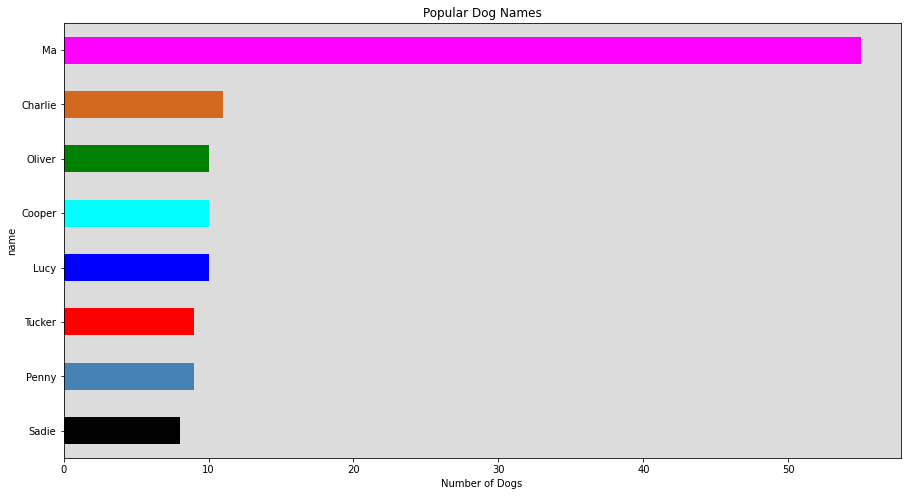

In [64]:
color=['black','steelblue','red','blue', 'aqua', 'green', 'chocolate', 'fuchsia']
ax = plt.axes()
ax.set_facecolor("gainsboro")
master_df.name.value_counts()[0:8].sort_values().plot(kind='barh', figsize=(15,8), title='Popular Dog Names', color=color).set_xlabel("Number of Dogs");

In [65]:
master_df.name.value_counts()[:8]

name
Ma         55
Charlie    11
Lucy       10
Cooper     10
Oliver     10
Penny       9
Tucker      9
Sadie       8
Name: count, dtype: int64

From the above plot, we can clearly see that the popular name of the dog is **`Ma`** with 55 numbers. This is the name of the dog that we renamed during the cleaning section 6. The second and third position in the list are Charlie (with 11) and Lucy (with 10) and so on.

### 2. Which dog stage the is most common in the dog_stage group?

In [66]:
dog_stage = master_df[['dog_stage']].stack().value_counts().to_frame('count').rename_axis('breed').reset_index()
values = dog_stage['count'].tolist()
mylabels = dog_stage['breed'].tolist()
dog_stage

,breed,count
0,pupper,201
1,doggo,63
2,puppo,22
3,"doggo,pupper",8
4,floofer,7
5,"doggo,puppo",1
6,"doggo,floofer",1


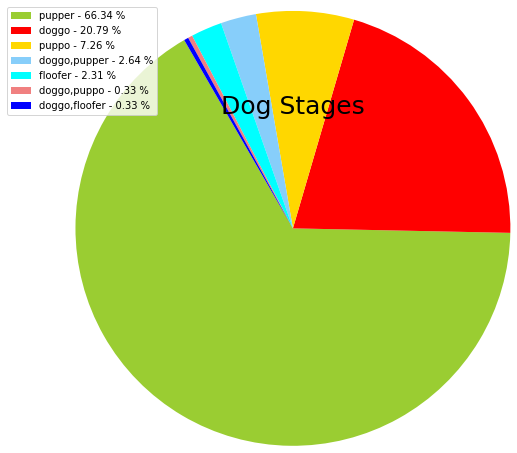

In [67]:
x = np.char.array(mylabels)
y = np.array(values)
colors = ['yellowgreen','red','gold','lightskyblue','cyan','lightcoral','blue','pink']
porcent = 100.*y/y.sum()

# plot pie chart
patches, texts = plt.pie(y, colors=colors, startangle=120, radius=2.5)
plt.title('Dog Stages', fontsize=25)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc=4, bbox_to_anchor=(-0.1, 1.), fontsize=10);

From the above pie chart, we can see that most of the dog stage is unknown, because the total count for each breed from the entire tweet is less. With the avilable dog stages, the dog stage of **`pupper`** gets the first position with 66.34%. The second and third position is taken by **`doggo`**, **`puppo`** and so on. 

### 3. Which type of breed is the most common breed?

In [68]:
# select all the prediction of dogs as true 
master_df = master_df.loc[master_df['p1_dog'] == True]
master_df = master_df.loc[master_df['p2_dog'] == True]
master_df = master_df.loc[master_df['p3_dog'] == True]

In [69]:
# count all the breeds together
df_breed = master_df[['p1','p2','p3']].stack().value_counts().to_frame('count').rename_axis('breed').reset_index()

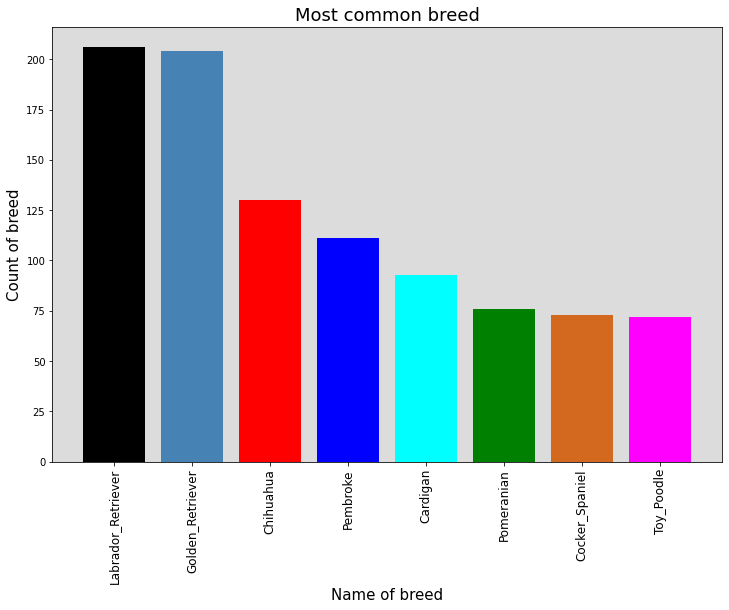

In [70]:
# plot most common breed
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_facecolor("gainsboro")
plt.bar(df_breed['breed'][:8], df_breed['count'][:8], color=color)
plt.xticks(df_breed['breed'][0:8], rotation='vertical', fontsize=12);
plt.xlabel('Name of breed',fontsize=15)
plt.ylabel('Count of breed',fontsize=15)
plt.title('Most common breed', fontsize=18)
plt.show()

In [71]:
df_breed.head()

,breed,count
0,Labrador_Retriever,206
1,Golden_Retriever,204
2,Chihuahua,130
3,Pembroke,111
4,Cardigan,93


We can see clearly from the above plot that the breed **`Labrador_Retriever`** is the most common breed and the breed **`Golden_Retriever`** is the second most common breed which is also very close to the **`Labrador_Retriever`**. The breed **`Chihuahua`** takes the third position and other breeds on the further positions.

**Reference:**

1. https://datascience.stackexchange.com/questions/53676/how-to-delete-a-row-if-a-values-in-a-column-is-not-nan
2. https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
3. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
4. https://stackoverflow.com/questions/53250929/python-applying-title-function-to-values-in-column
5. https://stackoverflow.com/questions/45787782/combine-multiple-columns-in-pandas-excluding-nans
6. https://www.w3schools.com/python/matplotlib_pie_charts.asp
7. https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-pie-chart
8. https://stackoverflow.com/questions/59546513/groupby-count-same-values-in-two-columns-in-pandas